In [1]:
''' 4. IMDB dataset '''

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Using Theano backend.


17465344/17464789 [==============================] - 9s 1us/step


In [3]:
print(train_data[0])
print(train_labels[0])
print(max([max(sequence) for sequence in train_data]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999


In [6]:
# Decoding
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [8]:
# Encoding integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

[ 0.  1.  1. ...,  0.  0.  0.]


In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# Building network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
# Configuring the optimizer, losses and metrics

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [12]:
# Validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 296us/step - loss: 0.5257 - binary_accuracy: 0.7788 - val_loss: 0.3985 - val_binary_accuracy: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.3187 - binary_accuracy: 0.8997 - val_loss: 0.3108 - val_binary_accuracy: 0.8874
Epoch 3/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2305 - binary_accuracy: 0.9246 - val_loss: 0.3031 - val_binary_accuracy: 0.8755
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1823 - binary_accuracy: 0.9409 - val_loss: 0.2785 - val_binary_accuracy: 0.8864
Epoch 5/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1485 - binary_accuracy: 0.9537 - val_loss: 0.2812 - val_binary_accuracy: 0.8853
Epoch 6/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1204 - binary_accuracy: 0.9638 - val_loss: 0.3067 - val_bi

In [14]:
# Training and validation loss

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

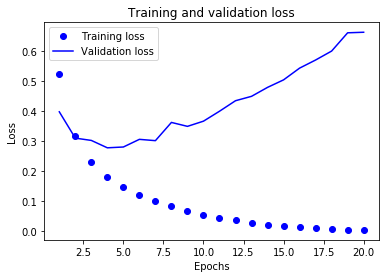

In [16]:
# Visualising loss

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

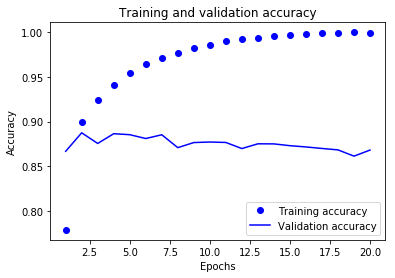

In [17]:
# Visualizing accuracy

plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Retraining the model on a whole training set and evaluation on test set

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

# resulting accuracy - 88%

Epoch 1/5
25000/25000 [==============================] - 2s 78us/step - loss: 0.4587 - acc: 0.8153
Epoch 2/5
25000/25000 [==============================] - 2s 72us/step - loss: 0.2633 - acc: 0.9116
Epoch 3/5
25000/25000 [==============================] - 2s 72us/step - loss: 0.2017 - acc: 0.9300
Epoch 4/5
25000/25000 [==============================] - 2s 73us/step - loss: 0.1675 - acc: 0.9416
Epoch 5/5
25000/25000 [==============================] - 4s 160us/step
[0.31115977492809294, 0.88051999999999997]


In [1]:
''' 5. Reuters dataset '''

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using Theano backend.


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
#train_data[10]

In [4]:
# Decoding newswires back to test

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[10]])
print(decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [6]:
## Re-using vectorizer from IMDB

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [7]:
# Ohe-hot encoding of labels

def to_one_hot(labels, dimension=64):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
# Building model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
# Training

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 247us/step - loss: 2.6752 - acc: 0.4851 - val_loss: 1.7585 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.4370 - acc: 0.6901 - val_loss: 1.2963 - val_acc: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.0536 - acc: 0.7699 - val_loss: 1.1248 - val_acc: 0.7590
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.8363 - acc: 0.8231 - val_loss: 1.0229 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.6721 - acc: 0.8601 - val_loss: 0.9607 - val_acc: 0.7880
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5427 - acc: 0.8893 - val_loss: 0.9062 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 1s 135us/step - loss: 0.4451 - acc: 0.9093 - val_loss: 0.8884 - val_acc: 0.8070


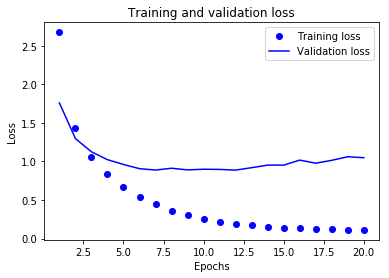

In [12]:
# Loss 

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

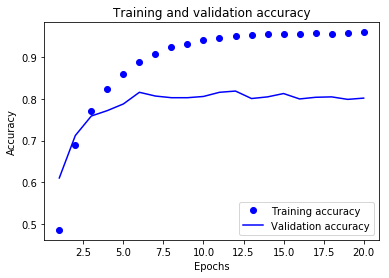

In [13]:
# Accuracy

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
# Retraining on whole training dataset

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs=10, batch_size=512)

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

# About 80% accuracy

Epoch 1/10
8982/8982 [==============================] - 1s 106us/step - loss: 2.6928 - acc: 0.5424
Epoch 2/10
8982/8982 [==============================] - 1s 120us/step - loss: 1.4029 - acc: 0.7253
Epoch 3/10
8982/8982 [==============================] - 1s 108us/step - loss: 1.0026 - acc: 0.7898
Epoch 4/10
8982/8982 [==============================] - 1s 107us/step - loss: 0.7789 - acc: 0.8356
Epoch 5/10
8982/8982 [==============================] - 1s 109us/step - loss: 0.6103 - acc: 0.8765
Epoch 6/10
8982/8982 [==============================] - 1s 108us/step - loss: 0.4860 - acc: 0.8996
Epoch 7/10
8982/8982 [==============================] - 1s 116us/step - loss: 0.3882 - acc: 0.9225
Epoch 8/10
8982/8982 [==============================] - 1s 108us/step - loss: 0.3159 - acc: 0.9333
Epoch 9/10
8982/8982 [==============================] - 1s 108us/step - loss: 0.2712 - acc: 0.9399
Epoch 10/10
2246/2246 [==============================] - 0s 101us/step
[0.95911194316425818, 0.79741763139768

In [32]:
# To compare with - random model

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

# Random model gives 19% accuracy

0.19278717720391808

In [33]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
3


In [35]:
# Different way to handle the labels and the loss

y_train = np.array(train_labels)
y_test = np.array(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/10
8982/8982 [==============================] - 1s 111us/step - loss: 2.4520 - acc: 0.5128
Epoch 2/10
8982/8982 [==============================] - 1s 109us/step - loss: 1.3297 - acc: 0.7208
Epoch 3/10
8982/8982 [==============================] - 1s 107us/step - loss: 0.9884 - acc: 0.7811
Epoch 4/10
8982/8982 [==============================] - 1s 108us/step - loss: 0.7786 - acc: 0.8312
Epoch 5/10
8982/8982 [==============================] - 1s 109us/step - loss: 0.6144 - acc: 0.8699
Epoch 6/10
8982/8982 [==============================] - 1s 109us/step - loss: 0.4881 - acc: 0.8978
Epoch 7/10
8982/8982 [==============================] - 1s 108us/step - loss: 0.3924 - acc: 0.9191
Epoch 8/10
8982/8982 [==============================] - 1s 107us/step - loss: 0.3175 - acc: 0.9316
Epoch 9/10
8982/8982 [==============================] - 1s 112us/step - loss: 0.2642 - acc: 0.9402
Epoch 10/10
2246/2246 [==============================] - 0s 78us/step
[0.97140211540996657, 0.783615316144080

In [14]:
# Playing with number of layers/units in layers

# 1) One more layer - no difference

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 135us/step - loss: 2.6876 - acc: 0.4866 - val_loss: 1.7124 - val_acc: 0.6070
Epoch 2/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.4539 - acc: 0.6873 - val_loss: 1.3773 - val_acc: 0.6930
Epoch 3/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.1093 - acc: 0.7494 - val_loss: 1.1811 - val_acc: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.8755 - acc: 0.8072 - val_loss: 1.0574 - val_acc: 0.7710
Epoch 5/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.7111 - acc: 0.8448 - val_loss: 0.9989 - val_acc: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.5650 - acc: 0.8785 - val_loss: 0.9784 - val_acc: 0.7930
Epoch 7/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.4574 - acc: 0.9035 - val_loss: 0.9929 - val_acc: 0.7970


NameError: name 'model_evaluate' is not defined

In [18]:
print(model.evaluate(x_val, y_val))
print(model.evaluate(x_test, one_hot_test_labels))

1000/1000 [==============================] - 0s 95us/step
[1.17313409948349, 0.79500000000000004]


In [19]:
# Playing with number of layers/units in layers

# 2) One layer less - no difference

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 125us/step - loss: 2.7147 - acc: 0.5470 - val_loss: 1.9237 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.5810 - acc: 0.7108 - val_loss: 1.4219 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.1363 - acc: 0.7722 - val_loss: 1.1803 - val_acc: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.8749 - acc: 0.8271 - val_loss: 1.0418 - val_acc: 0.7920
Epoch 5/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.6964 - acc: 0.8652 - val_loss: 0.9571 - val_acc: 0.8160
Epoch 6/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.5654 - acc: 0.8914 - val_loss: 0.9097 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.4638 - acc: 0.9100 - val_loss: 0.8604 - val_acc: 0.8220


In [21]:
print(model.evaluate(x_val, y_val))
print(model.evaluate(x_test, one_hot_test_labels))

1000/1000 [==============================] - 0s 80us/step
[0.91757491445541384, 0.81899999999999995]
2246/2246 [==============================] - 0s 77us/step
[1.0282617763865769, 0.79830810329474622]


In [22]:
# Playing with number of layers/units in layers

# 3) More units in layers - no difference

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 173us/step - loss: 2.2694 - acc: 0.5568 - val_loss: 1.4272 - val_acc: 0.6850
Epoch 2/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.1428 - acc: 0.7566 - val_loss: 1.1145 - val_acc: 0.7510
Epoch 3/20
7982/7982 [==============================] - 1s 180us/step - loss: 0.7888 - acc: 0.8339 - val_loss: 1.0454 - val_acc: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.5656 - acc: 0.8842 - val_loss: 0.9522 - val_acc: 0.7980
Epoch 5/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.4188 - acc: 0.9149 - val_loss: 0.8774 - val_acc: 0.8270
Epoch 6/20
7982/7982 [==============================] - 1s 174us/step - loss: 0.3112 - acc: 0.9336 - val_loss: 0.8783 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.2448 - acc: 0.9450 - val_loss: 0.9290 - val_acc: 0.8130


In [23]:
print(model.evaluate(x_val, y_val))
print(model.evaluate(x_test, one_hot_test_labels))

1000/1000 [==============================] - 0s 139us/step
[1.0524718832969666, 0.80400000000000005]
2246/2246 [==============================] - 0s 118us/step
[1.2008685872476226, 0.79162956366874448]


In [24]:
# Playing with number of layers/units in layers

# 4) Less units in layers - worse than original

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 118us/step - loss: 3.1064 - acc: 0.3840 - val_loss: 2.4143 - val_acc: 0.5390
Epoch 2/20
7982/7982 [==============================] - 1s 108us/step - loss: 2.0498 - acc: 0.5985 - val_loss: 1.7770 - val_acc: 0.6170
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.5531 - acc: 0.6669 - val_loss: 1.4701 - val_acc: 0.6660
Epoch 4/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.2588 - acc: 0.7314 - val_loss: 1.2818 - val_acc: 0.7080
Epoch 5/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.0549 - acc: 0.7719 - val_loss: 1.1701 - val_acc: 0.7430
Epoch 6/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.9042 - acc: 0.8061 - val_loss: 1.0975 - val_acc: 0.7610
Epoch 7/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.7808 - acc: 0.8381 - val_loss: 1.0449 - val_acc: 0.7680


In [25]:
print(model.evaluate(x_val, y_val))
print(model.evaluate(x_test, one_hot_test_labels))

1000/1000 [==============================] - 0s 63us/step
[1.0296739683151246, 0.79900000000000004]
2246/2246 [==============================] - 0s 66us/step
[1.170944959270243, 0.76847729299180978]


In [26]:
''' 6. House pricing dataset '''

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = \
        boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [27]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [28]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [31]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [32]:
# K-fold validation

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[: i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[: i*num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [33]:
print(all_scores)
print(np.mean(all_scores))

[2.238311826592625, 2.6063953579062282, 2.8266107233444062, 2.5948400591859722]
2.56653949176


In [34]:
# More epochs

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[: i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[: i*num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [37]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

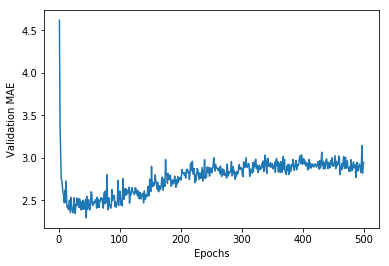

In [38]:
# Plotting validatioin scores

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

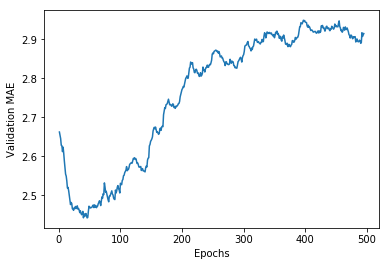

In [41]:
# Plotting smoothed scores

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [42]:
# Training the final model

model = build_model()
model.fit(train_data, train_targets,
         epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mse_score, test_mae_score)

102/102 [==============================] - 0s 20us/step
18.2179194432 2.62019752989
